In [1]:
import numpy as np
from numba import njit

class ImageHistPlotter:
    
    @classmethod
    def draw_img_hist(self,image, bins=256):
        hist, bins = self.calculate_hist(self.image.ravel(), self.bins, [0, 256])
        ax.plot(hist, color=color)
        ax.set_xlim([0, 256])
    
    @staticmethod
    def automatic_contrast_adjustment(hist, image, bins, range):
        """
        automatic contrast adjustment
        Args:
            image np.ndarray: image to adjust
        Returns: np.ndarray
        """
        a_low = min()
    
    @staticmethod
    @njit
    def compute_hist_for_channel(
                    image: np.ndarray,
                    #  bins: int,
                    #  ignote_part: float
                     ) -> np.ndarray:
        """
        compute histogram of image
        Args:
            image: np.ndarray - image to compute histogram
            bins: int - number of bins
            ignote_part: float - float number in range of [0..5]
        Returns: np.ndarray
        """
        
        image_h, image_w  = image.shape
        hist_rgb = np.zeros((256))
        
        for x in range(image_h):
            for y in range(image_w):
                i = image[x, y]               
                hist_rgb[i] += 1
        
        return hist_rgb

In [2]:
from PIL import Image

img = Image.open('test/test_data/sample_640×426.pnm')
img_array = np.array(img)

In [3]:
img_array.shape

(426, 640, 3)

In [30]:
from typing import Optional


def auto_contrast_correction(img: np.ndarray, ignore_range: Optional[float]=None) -> np.ndarray:
    image_h, image_w  = img.shape
    hist = ImageHistPlotter.compute_hist_for_channel(img)
    if ignore_range:
        persentile_min, persentile_max = int(ignore_range * 100), int((1 - ignore_range) * 100)
        q_low, q_high = np.percentile(hist, [persentile_min, persentile_max])
        
        a_min, a_max = min(hist), max(hist)
        a_low = min([hist[i] for i in range(len(hist)) if hist[i] >= q_low])
        a_high = max([hist[i] for i in range(len(hist)) if hist[i] <= q_high])
        
        def formula(pixel: int) -> int:
            if pixel < a_low:
                value =  a_min
            elif a_low <= pixel <= a_high:
                value = a_min + (pixel - a_low) * (a_max - a_min) / (a_high - a_low)
            elif pixel > a_high:
                value = a_max
            return value
        
        hist = np.vectorize(formula)(hist).astype(np.uint8)
    return hist

def auto_contrast_correction(img: np.ndarray, ignore_range: Optional[float]=None) -> np.ndarray:
    image_h, image_w  = img.shape
    hist = ImageHistPlotter.compute_hist_for_channel(img)
    if ignore_range:
        persentile_min, persentile_max = int(ignore_range * 100), int((1 - ignore_range) * 100)
        q_low, q_high = np.percentile(hist, [persentile_min, persentile_max])
        
        a_min, a_max = min(hist), max(hist)
        a_low = min([hist[i] for i in range(len(hist)) if hist[i] >= q_low])
        a_high = max([hist[i] for i in range(len(hist)) if hist[i] <= q_high])
        
        def formula(pixel: int) -> int:
            if pixel < a_low:
                value =  a_min
            elif a_low <= pixel <= a_high:
                value = a_min + (pixel - a_low) * (a_max - a_min) / (a_high - a_low)
            elif pixel > a_high:
                value = a_max
            return value
        
        hist = np.vectorize(formula)(hist).astype(np.uint8)
    return hist

def modified_auto_contast(img):
    img_h, img_w, channels = img.shape
    new_img = img.copy()
    new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2YCrCb)
    
    hist = auto_contrast_correction(new_img[:, :, 0], 0.1)
    
    for i in range(img_h):
        for j in range(img_w):
            new_img[i, j, 0] = hist[img[i, j, 0]]
    
    new_img = cv2.cvtColor(new_img, cv2.COLOR_YCrCb2RGB)
    return img

def image_channel_from_hist(hist, img_channel):
    cs = hist.cumsum()
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()
    cs = nj / N
    cs = cs.astype('uint8')
    img_channel = cs[img_channel.flatten()].reshape(img_channel.shape)
    return img_channel
    

def get_hist_array(img_channel, color: str='black', bins: int=90, cumsum: np.ndarray=None):
    io_buf = io.BytesIO()
    
    fig, ax = plt.subplots(1, 2)
    
    ax[0].hist(img_channel.flatten(), bins,
            density = False, 
            histtype ='bar',
            color = color,
    )
    ax[0].set_title('Histogram')
    
    ax[1].plot(cumsum)
    ax[1].set_title('Cumulative Histogram')
    
    plt.legend(prop ={'size': 10})
    
    
    plt.savefig(io_buf, format='raw')
    io_buf.seek(0)
    img_arr = np.reshape(np.frombuffer(io_buf.getvalue(), dtype=np.uint8),
                        newshape=(int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
    io_buf.close()
    return img_arr


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/k_/8f8t24vs32x82lyxvr104sd40000gn/T/ipykernel_18854/3886914328.py:42: RuntimeWarning: invalid value encountered in double_scalars
  value = a_min + (pixel - a_low) * (a_max - a_min) / (a_high - a_low)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


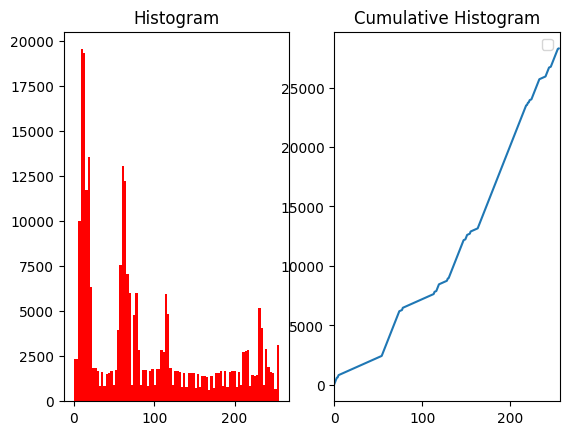

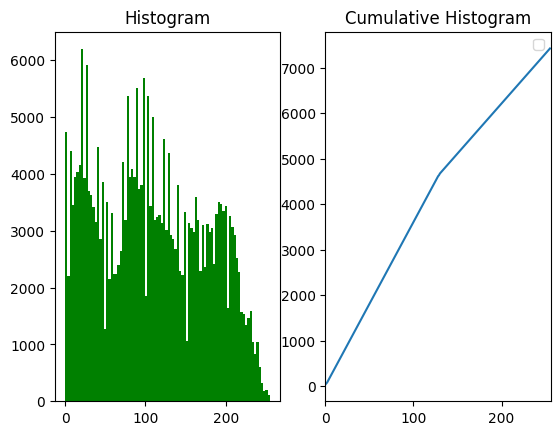

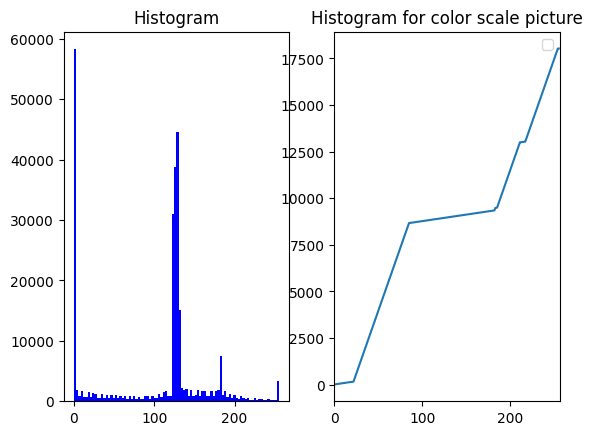

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import io

    
color = ('r', 'g', 'b')
# img_cv = auto_contrast_correction(img_array)
new_img = np.zeros(img_array.shape, dtype=np.uint8)
histograms, images = [], []

for channel,col in enumerate(color):
    img_c = img_array[:, :, channel]
    
    histr = auto_contrast_correction(
        img_c,
        ignore_range=0.5
        )
    # cs = histr.cumsum()
    # img_c = histr[img_c.flatten()].reshape(img_c.shape)
    img_c = image_channel_from_hist(histr, img_c)
    
    histograms += [get_hist_array(img_channel=img_c, color=col, cumsum=histr.cumsum())]
    images += [img_c]
    new_img[:, :, channel] = img_c
    # plt.plot(histr)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

In [ ]:
np.linalg.norm(new_img - img_array)

154425.24511879525

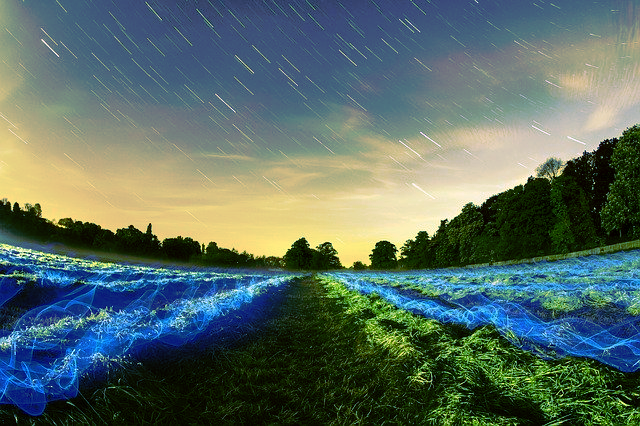

In [8]:
Image.fromarray(new_img)

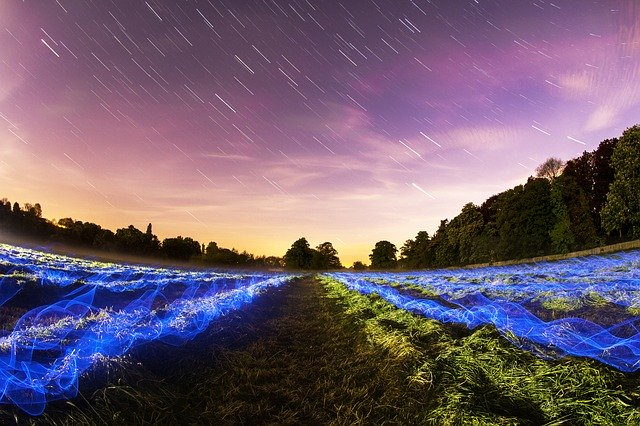

In [67]:
Image.fromarray(img_array)